In [1]:
from pandas_datareader import data
import datetime
from matplotlib import pyplot as plt

import korea_apartment_price

In [2]:
apts = korea_apartment_price.shortcuts.search('압구정동', '현대')
apts = [e for e in apts if e['name'].startswith('현대') and e['name'].find('빌라트') == -1 and e['name'].find('차') > -1]
apts = [e for e in apts if int(e['name'].replace('현대', '').split('차')[0]) in [6, 7] ]
apts

[{'address': '서울특별시 강남구 압구정동',
  'lawaddrcode': '1168011000',
  'name': '현대6차(78~81,83,84,86,87동)'},
 {'address': '서울특별시 강남구 압구정동',
  'lawaddrcode': '1168011000',
  'name': '현대7차(73~77,82,85동)'}]

In [3]:
sizes = set(korea_apartment_price.db.query_trades(apt_ids=apts, filters=[korea_apartment_price.db.pick_size]))
sizes

{43, 47, 59, 74}

In [4]:
entries = korea_apartment_price.db.query_trades(apt_ids=apts, size_from=43, size_to=43, date_from=20060101)
x1 = []
y1 = []
for e in entries:
    x1.append(datetime.date(year=int(e['year']), month=int(e['month']), day=int(e['date'])))
    y1.append(int(e['price'] / e['size'] * 3.3))
print(x1[0])

2006-01-04


In [5]:
df = data.DataReader("^KS11", "yahoo", datetime.datetime(2006, 1, 1))
x2 = [e.date() for e in df.index]
y2 = df['Close'].to_list()

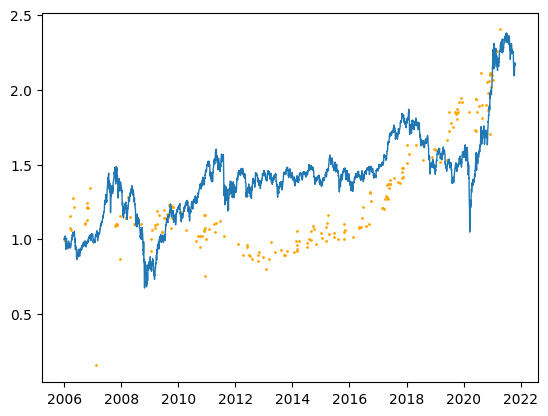

In [6]:
y1 = [v/y1[0] for v in y1]
y2 = [v/y2[0] for v in y2]
plt.figure()
plt.scatter(x1, y1, s=1, color='orange')
plt.plot(x2, y2, linewidth=1)
plt.show()